In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv('amazon_alexa.tsv',delimiter='\t')

In [4]:
df.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   rating            3150 non-null   int64 
 1   date              3150 non-null   object
 2   variation         3150 non-null   object
 3   verified_reviews  3149 non-null   object
 4   feedback          3150 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 123.2+ KB


In [6]:
df.describe()

,rating,feedback
count,3150.000000,3150.000000
mean,4.463175,0.918413
std,1.068506,0.273778
min,1.000000,0.000000
25%,4.000000,1.000000
50%,5.000000,1.000000
75%,5.000000,1.000000
max,5.000000,1.000000


In [7]:
df.isnull().sum()

rating              0
date                0
variation           0
verified_reviews    1
feedback            0
dtype: int64

In [8]:
df['length']=df['verified_reviews'].astype(str).apply(len)

In [9]:
df

,rating,date,variation,verified_reviews,feedback,length
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,13
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,9
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1,195
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,172
4,5,31-Jul-18,Charcoal Fabric,Music,1,5
...,...,...,...,...,...,...
3145,5,30-Jul-18,Black Dot,"Perfect for kids, adults and everyone in betwe...",1,50
3146,5,30-Jul-18,Black Dot,"Listening to music, searching locations, check...",1,135
3147,5,30-Jul-18,Black Dot,"I do love these things, i have them running my...",1,441
3148,5,30-Jul-18,White Dot,Only complaint I have is that the sound qualit...,1,380


In [12]:
from  textblob import TextBlob

In [13]:
def get_polarity(text):
    textblob=TextBlob(str(text.encode('utf-8')))
    pol=textblob.sentiment.polarity
    return pol

In [14]:
df['polarity']=df['verified_reviews'].astype(str).apply(get_polarity)

In [15]:
def get_subjectivity(text):
    textblob=TextBlob(str(text.encode('utf-8')))
    sub=textblob.sentiment.subjectivity
    return sub



In [16]:
df['subjectivity']=df['verified_reviews'].astype(str).apply(get_subjectivity)

In [17]:
df

,rating,date,variation,verified_reviews,feedback,length,polarity,subjectivity
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,13,0.625000,0.600000
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,9,0.875000,0.800000
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1,195,-0.100000,0.512500
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,172,0.350000,0.450000
4,5,31-Jul-18,Charcoal Fabric,Music,1,5,0.000000,0.000000
...,...,...,...,...,...,...,...,...
3145,5,30-Jul-18,Black Dot,"Perfect for kids, adults and everyone in betwe...",1,50,1.000000,1.000000
3146,5,30-Jul-18,Black Dot,"Listening to music, searching locations, check...",1,135,0.333333,0.452381
3147,5,30-Jul-18,Black Dot,"I do love these things, i have them running my...",1,441,0.237662,0.533766
3148,5,30-Jul-18,White Dot,Only complaint I have is that the sound qualit...,1,380,0.316667,0.632099


In [18]:
df[['length','polarity','subjectivity']].describe()

,length,polarity,subjectivity
count,3150.000000,3150.000000,3150.000000
mean,132.049206,0.349792,0.528922
std,182.100176,0.303362,0.256324
min,1.000000,-1.000000,0.000000
25%,30.000000,0.123852,0.419196
50%,74.000000,0.350000,0.585000
75%,165.000000,0.533333,0.695486
max,2851.000000,1.000000,1.000000


In [19]:
df['word_count'] = df['verified_reviews'].astype(str).apply(lambda x: len(x.split()))


In [20]:
df['word_density'] = df['length']  / (df['word_count'] + 1)

In [21]:
df.head()

,rating,date,variation,verified_reviews,feedback,length,polarity,subjectivity,word_count,word_density
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,13,0.625,0.6000,3,3.250000
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,9,0.875,0.8000,2,3.000000
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1,195,-0.100,0.5125,38,5.000000
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,172,0.350,0.4500,34,4.914286
4,5,31-Jul-18,Charcoal Fabric,Music,1,5,0.000,0.0000,1,2.500000


In [22]:
import string
punctuation = string.punctuation

In [23]:
df['punctuation_count'] = df['verified_reviews'].astype(str).apply(lambda x:len("".join(_ for _ in x if _ in punctuation)))

In [24]:
df[['length','word_count','word_density','punctuation_count']].describe()

,length,word_count,word_density,punctuation_count
count,3150.000000,3150.000000,3150.000000,3150.000000
mean,132.049206,25.293016,4.605186,3.887937
std,182.100176,34.584971,1.135137,5.762348
min,1.000000,0.000000,0.500000,0.000000
25%,30.000000,6.000000,4.269231,1.000000
50%,74.000000,14.000000,4.805665,2.000000
75%,165.000000,32.000000,5.207974,5.000000
max,2851.000000,526.000000,32.500000,121.000000


In [29]:
df[df.word_density==32.5]

,rating,date,variation,verified_reviews,feedback,length,polarity,subjectivity,word_count,word_density,punctuation_count
1362,5,19-Jul-18,Black Spot,https://www.amazon.com/dp/B073SQYXTW/ref=cm_cr...,1,65,0.0,0.0,1,32.5,15


In [27]:
df.verified_reviews.iloc[2016]

"Incredible piece of technology.I have this right center of my living room on an island kitchen counter. The mic and speaker goes in every direction and the quality of the sound is quite good. I connected the Echo via Bluetooth to my Sony soundbar on my TV but find the Echo placement and 360 sound more appealing. It's no audiophile equipment but there is good range and decent bass. The sound is more than adequate for any indoor entertaining and loud enough to bother neighbors in my building. The knob on the top works great for adjusting volume. This is my first Echo device and I would imagine having to press volume buttons (on the Echo 2) a large inconvenience and not as precise. For that alone I would recommend this over the regular Echo (2nd generation).The piece looks quality and is quite sturdy with some weight on it. The rubber material on the bottom has a good grip on the granite counter-- my cat can even rub her scent on it without tipping it over.This order came with a free Phi

In [ ]:
# Defining Part-of-Speech Tags

pos_dic = {
    'noun' : ['NN', 'NNS', 'NNP', 'NNPS'],
    'pron' : ['PRP', 'PRP$', 'WP', 'WP$'],
    'verb' : ['VB', 'VBD', 'VBG', 'VBN', 'VBP', 'VBZ'],
    'adj'  : ['JJ', 'JJR', 'JJS'],
    'adv'  : ['RB', 'RBR', 'RBS', 'WRB']
}

In [ ]:
def pos_check(x,flag):
    cnt=0
    try:
        wiki=

In [31]:
import seaborn as sns

In [30]:
df['rating'].value_counts()

rating
5    2286
4     455
1     161
3     152
2      96
Name: count, dtype: int64

<Axes: xlabel='rating', ylabel='count'>

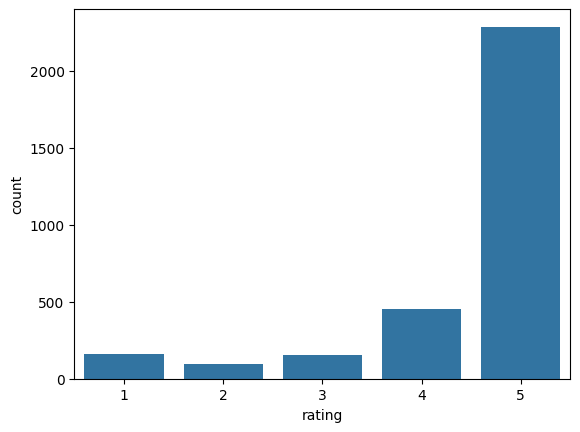

In [33]:
sns.countplot(x='rating',data=df)

<Axes: xlabel='feedback', ylabel='count'>

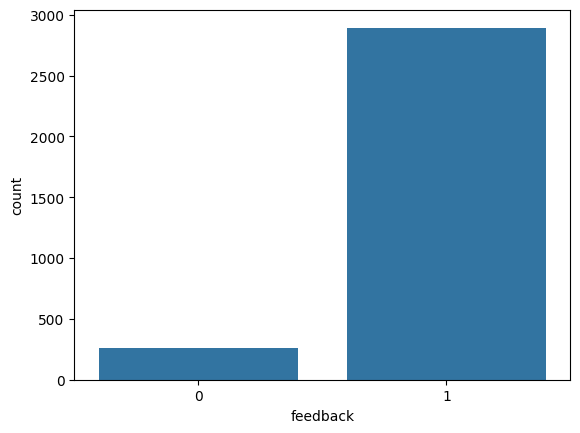

In [34]:
sns.countplot(x='feedback',data=df)

<Axes: ylabel='proportion'>

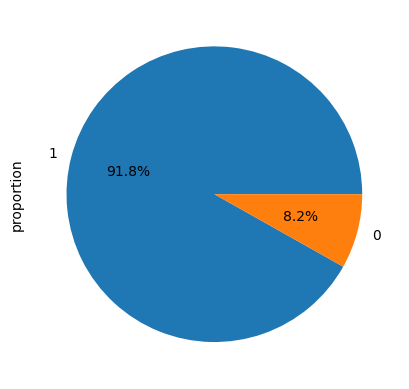

In [35]:
df['feedback'].value_counts(normalize=True).plot(kind='pie', autopct="%1.1f%%")

In [36]:
df.groupby('feedback')['rating'].value_counts()

feedback  rating
0         1          161
          2           96
1         5         2286
          4          455
          3          152
Name: count, dtype: int64

1-2 rating are the negative reviews due to the fact that the whole did not give feedback while 3-5 are the positive reviews

In [37]:
df['variation'].value_counts()

variation
Black  Dot                      516
Charcoal Fabric                 430
Configuration: Fire TV Stick    350
Black  Plus                     270
Black  Show                     265
Black                           261
Black  Spot                     241
White  Dot                      184
Heather Gray Fabric             157
White  Spot                     109
White                            91
Sandstone Fabric                 90
White  Show                      85
White  Plus                      78
Oak Finish                       14
Walnut Finish                     9
Name: count, dtype: int64

array([<Axes: title={'center': '0'}>, <Axes: title={'center': '1'}>],
      dtype=object)

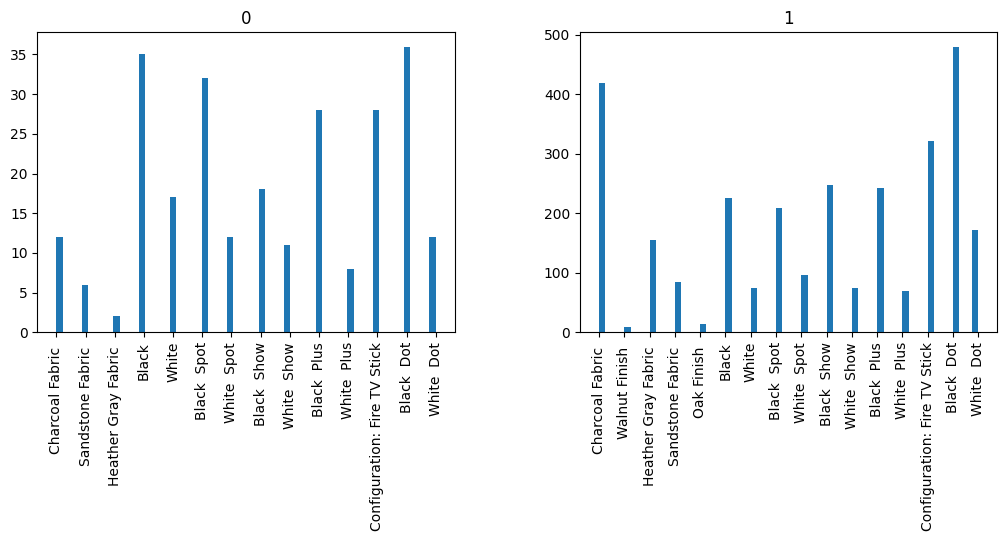

In [40]:
df.hist(column='variation',by='feedback',bins=60,figsize=(12,4))

<Axes: xlabel='variation'>

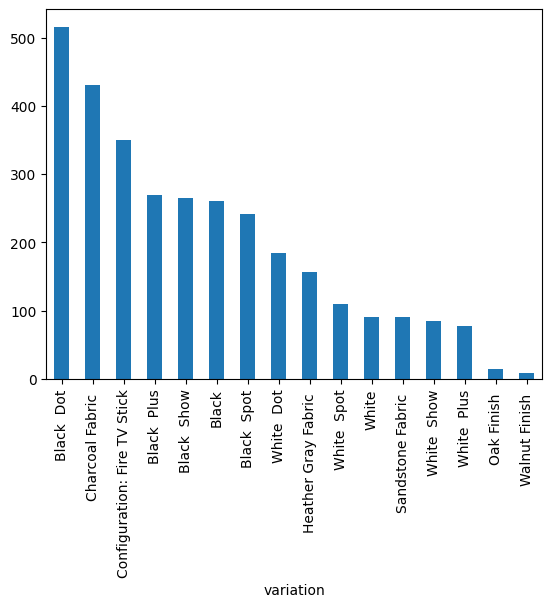

In [41]:
df['variation'].value_counts().plot(kind='bar')

In [42]:
df.groupby('variation')[['rating','feedback','length']].mean().sort_values(by='rating',ascending=False)

,rating,feedback,length
variation,,,
Walnut Finish,4.888889,1.000000,137.666667
Oak Finish,4.857143,1.000000,103.714286
Charcoal Fabric,4.730233,0.972093,119.118605
Heather Gray Fabric,4.694268,0.987261,117.197452
Configuration: Fire TV Stick,4.591429,0.920000,86.542857
Black Show,4.490566,0.932075,146.203774
Black Dot,4.453488,0.930233,113.920543
White Dot,4.423913,0.934783,94.913043
Black Plus,4.370370,0.896296,185.796296


In [55]:
df.isnull().sum()

rating               0
date                 0
variation            0
verified_reviews     0
feedback             0
length               0
polarity             0
subjectivity         0
word_count           0
word_density         0
punctuation_count    0
dtype: int64

In [54]:
df=df.dropna()

In [ ]:
df

<Axes: xlabel='length', ylabel='Count'>

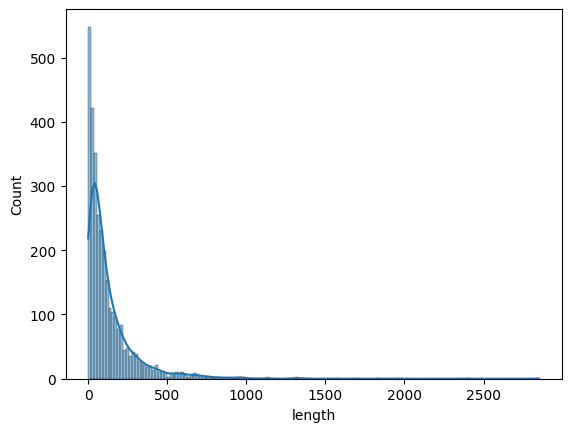

In [56]:
sns.histplot(data=df,x='length',kde=True)

In [62]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from nltk.stem.porter import PorterStemmer
import re
from nltk.corpus import stopwords
STOPWORDS= set(stopwords.words('english'))
from sklearn.model_selection import train_test_split 

In [88]:
stopwords.readme()

'Stopwords Corpus\n\nThis corpus contains lists of stop words for several languages.  These\nare high-frequency grammatical words which are usually ignored in text\nretrieval applications.\n\nThey were obtained from:\nhttp://anoncvs.postgresql.org/cvsweb.cgi/pgsql/src/backend/snowball/stopwords/\n\nThe stop words for the Romanian language were obtained from:\nhttp://arlc.ro/resources/\n\nThe English list has been augmented\nhttps://github.com/nltk/nltk_data/issues/22\n\nThe German list has been corrected\nhttps://github.com/nltk/nltk_data/pull/49\n\nA Kazakh list has been added\nhttps://github.com/nltk/nltk_data/pull/52\n\nA Nepali list has been added\nhttps://github.com/nltk/nltk_data/pull/83\n\nAn Azerbaijani list has been added\nhttps://github.com/nltk/nltk_data/pull/100\n\nA Greek list has been added\nhttps://github.com/nltk/nltk_data/pull/103\n\nAn Indonesian list has been added\nhttps://github.com/nltk/nltk_data/pull/112\n'

In [57]:
corpus = []

stemmer = PorterStemmer()
for i in range(0, df.shape[0]):
    review = re.sub('[^a-zA-Z]',' ', df.iloc[i]['verified_reviews'])
    review = review.lower().split()
    review = [stemmer.stem(word) for word in review if word not in STOPWORDS]
    review = ' '.join(review)
    corpus.append(review)

In [84]:
sentence='i am a boy, she is a girl. There is something here.'

out=re.sub('[^a-zA-Z]',' ',sentence)
out
out=out.lower().split()
new=[stemmer.stem(word) for word in out if word not in STOPWORDS]
new

['boy', 'girl', 'someth']

In [135]:
cv=CountVectorizer(max_features=3149)
X=cv.fit_transform(corpus).toarray()
y=df['feedback'].values

In [136]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [59]:
import pickle

pickle.dump(cv, open('cv.pkl','wb'))

In [137]:
print(f"x shape: {X.shape}")
print(f"y shape: {y.shape}")

x shape: (3149, 2765)
y shape: (3149,)


In [138]:
x_train, x_test, y_train, y_test= train_test_split(X, y, test_size= 0.2, random_state= 0)

In [139]:
from sklearn.preprocessing import StandardScaler

# Initialize StandardScaler
scaler = StandardScaler()

# Fit on training data and transform it
x_train_sc = scaler.fit_transform(x_train)

# Transform test data (using the same scaler as fitted on training data)
x_test_sc = scaler.transform(x_test)

In [133]:

pickle.dump(scaler, open('scaler.pkl', 'wb'))

In [142]:
rfc= RandomForestClassifier(class_weight='balanced')
rfc.fit(x_resampled, y_resampled)

RandomForestClassifier(class_weight='balanced')

In [114]:
pickle.dump(rfc, open('random_forest.pkl','wb'))

In [73]:
import joblib

In [115]:
joblib.dump(rfc,'random_forest1.pkl')
joblib.dump(cv,'vectorizer.pkl')

['vectorizer.pkl']

In [143]:
pred1= rfc.predict(x_test_sc)
pred1

array([1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [145]:
cm= confusion_matrix(y_test, pred1)
cm

array([[ 19,  26],
       [ 24, 561]])

In [118]:
print("training accuracy: ", rfc.score(x_train_sc, y_train))
print("testing accuracy: ", rfc.score(x_test_sc, y_test))

training accuracy:  0.9777689559348948
testing accuracy:  0.9174603174603174


In [90]:
xg=XGBClassifier()

In [92]:
model2=xg.fit(x_train,y_train)

In [95]:
pred_mod2=model2.predict(x_test_sc)

In [ ]:
pred_mod2

In [97]:
confusion_matrix(y_test,pred_mod2)

array([[ 17,  28],
       [ 13, 572]])

In [98]:
from sklearn.metrics import f1_score

f1=f1_score(y_test,pred_mod2,average='micro')
f1

np.float64(0.9349206349206349)

In [100]:
from sklearn.metrics import recall_score

In [125]:
recall_negative = recall_score(y_test, log_test, pos_label=0)

In [126]:
recall_negative

np.float64(0.7333333333333333)

In [140]:
from imblearn.over_sampling import SMOTE

smote=SMOTE()
x_resampled,y_resampled=smote.fit_resample(x_train_sc,y_train)

In [141]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(class_weight='balanced')
model.fit(x_resampled, y_resampled)

LogisticRegression(class_weight='balanced')

In [124]:
log_test=model.predict(x_test_sc)
log_test

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [127]:
confusion_matrix(y_test,log_test)

array([[ 33,  12],
       [ 58, 527]])

In [128]:
joblib.dump(model,'logistic_reg.pkl')

['logistic_reg.pkl']